In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving tips (data for regression problem).csv to tips (data for regression problem).csv


In [ ]:
da=pd.read_csv('tips (data for regression problem).csv')

In [ ]:
d=da.copy(deep=True)

In [ ]:
d.head(9)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2


In [ ]:
d.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
d['sex']=d['sex'].map({'Female':0,'Male':1})
d['smoker']=d['smoker'].map({'No':0,'Yes':1})

In [ ]:
d.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


In [ ]:
d.describe()

,total_bill,tip,sex,smoker,size
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.951100
min,3.070000,1.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,6.000000


In [ ]:
d.describe(include='object')

,day,time
count,244,244
unique,4,2
top,Sat,Dinner
freq,87,176


In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()
d['day']=encoder.fit_transform(d['day'],d['total_bill'])
d['time']=encoder.fit_transform(d['time'],d['total_bill'])
d=pd.concat([d.drop(columns=['day','time']),d['time'],d['day']],axis=1)
d.head(7)

,total_bill,tip,sex,smoker,size,time,day
0,16.99,1.01,0,0,2,20.797159,21.404017
1,10.34,1.66,1,0,3,20.797159,21.404017
2,21.01,3.50,1,0,3,20.797159,21.404017
3,23.68,3.31,1,0,2,20.797159,21.404017
4,24.59,3.61,0,0,4,20.797159,21.404017
5,25.29,4.71,1,0,4,20.797159,21.404017
6,8.77,2.00,1,0,2,20.797159,21.404017


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(d[['total_bill','tip','sex','smoker','day','time','size']])
scaled_data=pd.DataFrame(scaled_data,columns=['total_bill','tip','sex','smoker','day','time','size'])
d=scaled_data
d.head(9)

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,1.021794,0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,1.021794,0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,1.021794,0.621582,0.453383
3,0.438315,0.225754,0.744406,-0.784789,1.021794,0.621582,-0.600193
4,0.540745,0.443020,-1.343353,-0.784789,1.021794,0.621582,1.506958
5,0.619537,1.239659,0.744406,-0.784789,1.021794,0.621582,1.506958
6,-1.239955,-0.722971,0.744406,-0.784789,1.021794,0.621582,-0.600193
7,0.798507,0.088153,0.744406,-0.784789,1.021794,0.621582,1.506958
8,-0.534203,-0.751940,0.744406,-0.784789,1.021794,0.621582,-0.600193


In [ ]:
d.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,0.178530,0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,0.134439,0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,0.232334,0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.036152,0.054921,-0.133178
day,0.178530,0.134439,0.232334,-0.036152,1.000000,0.886893,0.166335
time,0.183118,0.121629,0.205231,0.054921,0.886893,1.000000,0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.166335,0.103411,1.000000


we can observe that there is a weak correlation between 'sex' and 'smoking status' with 'tip amount',
whereas there is a strong correlation between 'total bill' and 'size' with
'tip'.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, RidgeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
x=d.drop(columns=['tip'])
y=d['tip']
(x1,x2,y1,y2)=train_test_split(x,y,test_size=0.2,random_state=42)

Linear Regression

In [ ]:
LR=LinearRegression()
LR.fit(x1,y1)
y_pred=LR.predict(x2)
print('MSE:',mean_squared_error(y2,y_pred))

MSE: 0.3645282178996836


Lasso Regression

In [ ]:
lasso=Lasso()
lasso.fit(x1,y1)
y_pred=lasso.predict(x2)
print('MSE:',mean_squared_error(y2,y_pred))

MSE: 0.7598140959426919


Ridge Regression

In [ ]:
ridge=Ridge()
ridge.fit(x1,y1)
y_pred=ridge.predict(x2)
print('MSE:',mean_squared_error(y2,y_pred))

MSE: 0.36394977493779324


SVM Regression

In [ ]:
svr=SVR()
svr.fit(x1,y1)
y_pred=svr.predict(x2)
print('MSE:',mean_squared_error(y2,y_pred))

MSE: 0.3776747878382918


Decision Tree Regression

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x1,y1)
y_pred=dtr.predict(x2)
print('MSE:',mean_squared_error(y2,y_pred))

MSE: 0.6609085553179288


Random Forest Regression

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(x1,y1)
y_pred=rfr.predict(x2)
print('MSE:',mean_squared_error)

MSE: <function mean_squared_error at 0x7ccdd8241900>


KNN Regression

In [ ]:
knr=KNeighborsRegressor()
knr.fit(x1,y1)
y_pred=knr.predict(x2)
print('MSE:',mean_squared_error(y2,y_pred))

MSE: 0.4568462445575306


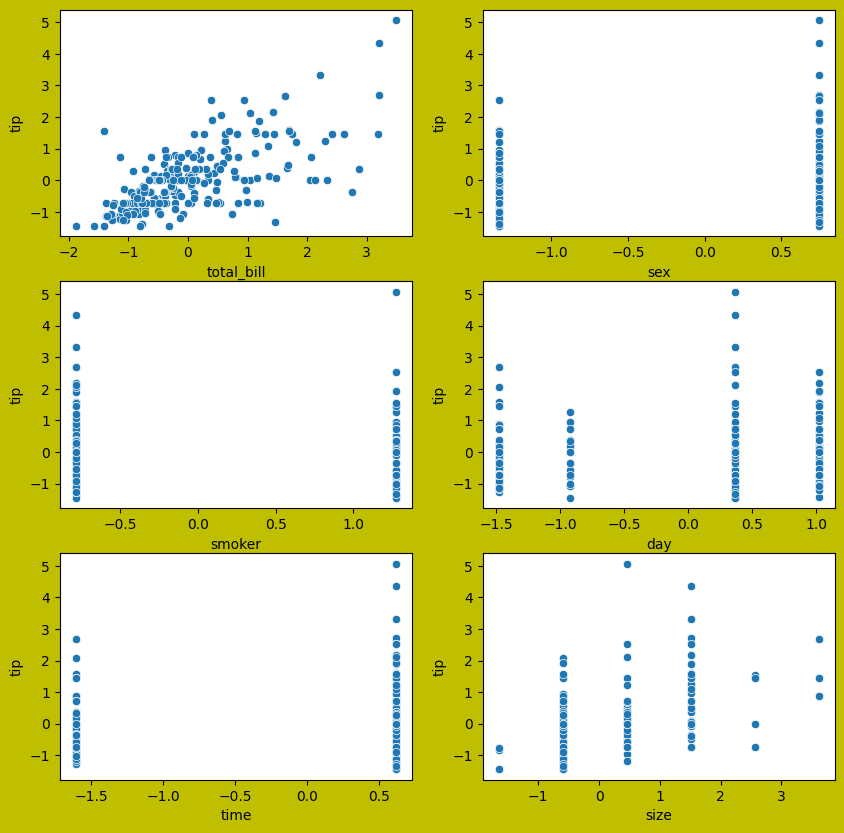

<Axes: >

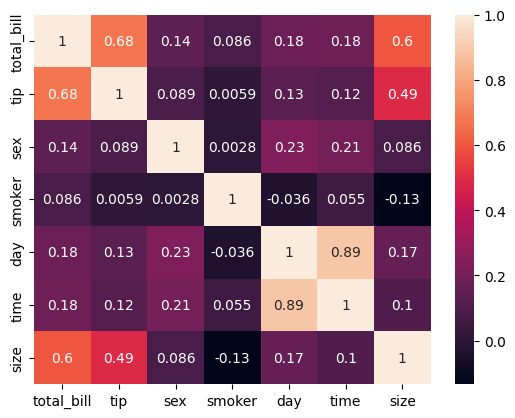

In [ ]:
#'total_bill','tip','sex','smoker','day','time','size'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(num=1,figsize=(10,10),facecolor='y')
plt.subplot(3,2,1)
sns.scatterplot(x='total_bill',y='tip',data=d)
plt.subplot(3,2,2)
sns.scatterplot(x='sex',y='tip',data=d)
plt.subplot(3,2,3)
sns.scatterplot(x='smoker',y='tip',data=d)
plt.subplot(3,2,4)
sns.scatterplot(x='day',y='tip',data=d)
plt.subplot(3,2,5)
sns.scatterplot(x='time',y='tip',data=d)
plt.subplot(3,2,6)
sns.scatterplot(x='size',y='tip',data=d)
plt.show()
sns.heatmap(d.corr(),annot=True)

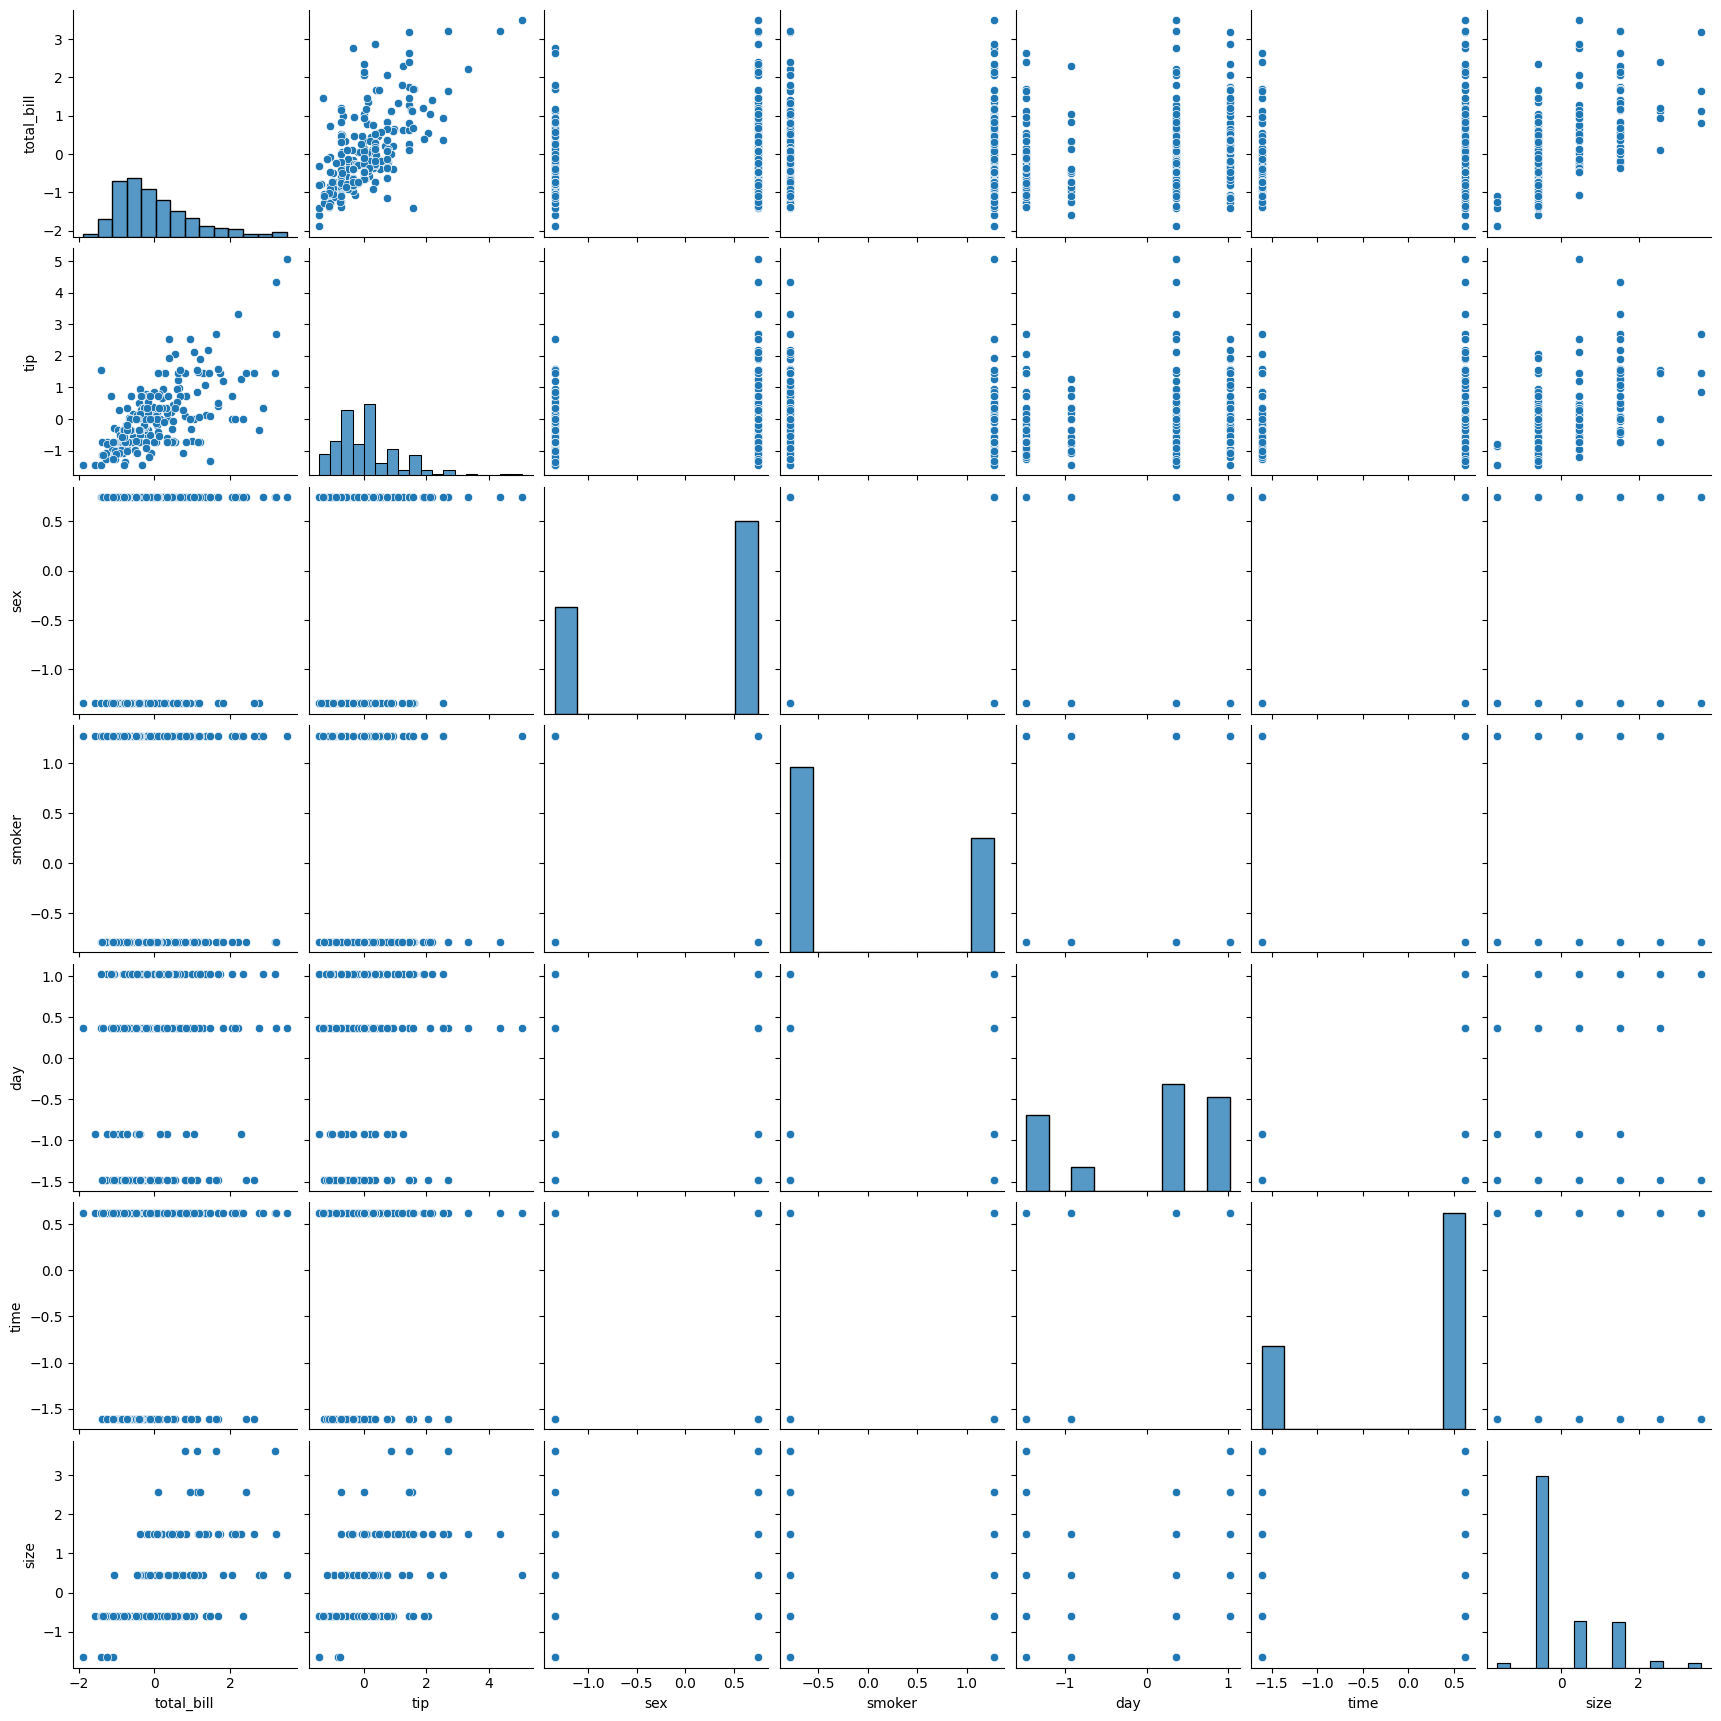

In [ ]:
sns.pairplot(d)

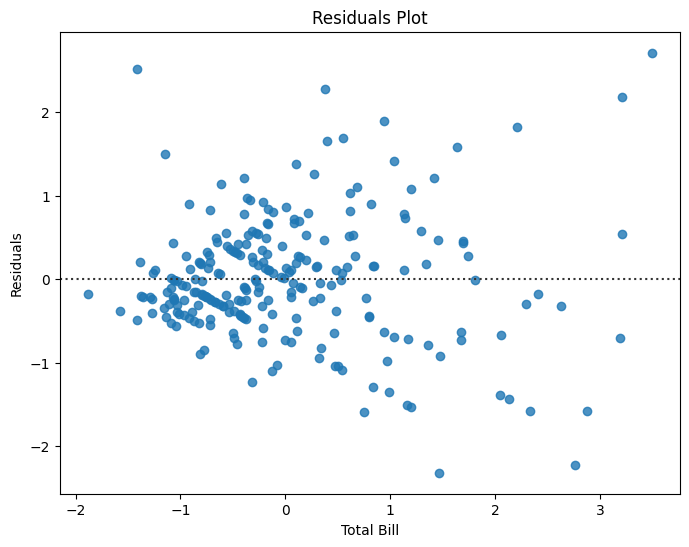

In [ ]:
plt.figure(figsize=(8, 6))
sns.residplot(x='total_bill', y='tip', data=d)
plt.title('Residuals Plot')
plt.xlabel('Total Bill')
plt.ylabel('Residuals')
plt.show()

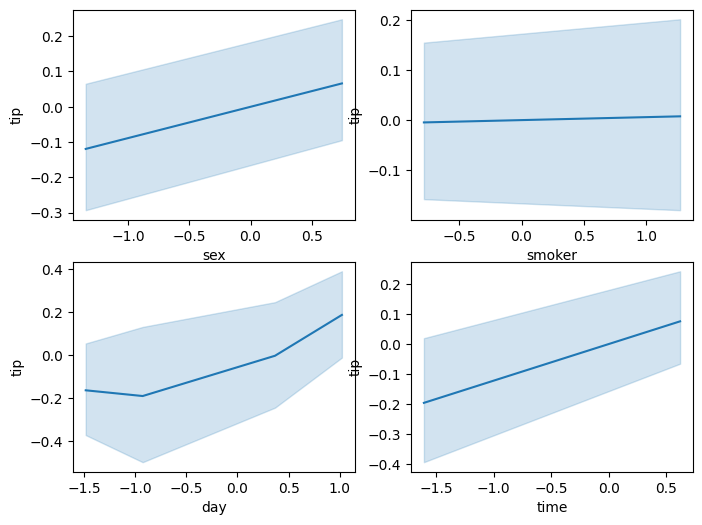

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.lineplot(x='sex',y='tip',data=d)
plt.subplot(2,2,2)
sns.lineplot(x='smoker',y='tip',data=d)
plt.subplot(2,2,3)
sns.lineplot(x='day',y='tip',data=d)
plt.subplot(2,2,4)
sns.lineplot(x='time',y='tip',data=d)
plt.show()

In [ ]:
import statsmodels.api as sm
x=d['total_bill']
y=d['tip']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           6.69e-34
Time:                        05:43:39   Log-Likelihood:                -271.81
No. Observations:                 244   AIC:                             547.6
Df Residuals:                     242   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.567e-16      0.047   5.42e-15      1.0

In [ ]:
model=LinearRegression()
model.fit(x1,y1)
y_pred=model.predict(x2)
mse=mean_squared_error(y2,y_pred)
mse

0.3645282178996836